In [1]:
import cupy as cp
import matplotlib.pyplot as plt
import features_single
import joblib.numpy_pickle as joblib
import numpy as np
import seaborn as sns
import pandas as pd
import seperate_spec_and_features
import make_labels
from matplotlib.ticker import MaxNLocator
from scipy.stats import mannwhitneyu, entropy
from matplotlib.ticker import MaxNLocator
from scipy.stats import chi2_contingency

In [2]:
spectograms_file = 'shank3USVs_many_properties.jl'
usvs = joblib.load(spectograms_file)
spec, emitter, distance_to_nearest_non_emitter, duration, start_time_in_recording, end_time_in_recording, intensities, intensity, location, main_freq, recording_path = seperate_spec_and_features.separate_spec_and_features(usvs)
labels, emitter_library = make_labels.make_labels(emitter,  label_type='strain')#
print(len(spec), len(labels))
print(labels[0:5])
original_length = len(spec)

50473 50473
[1 1 1 1 2]


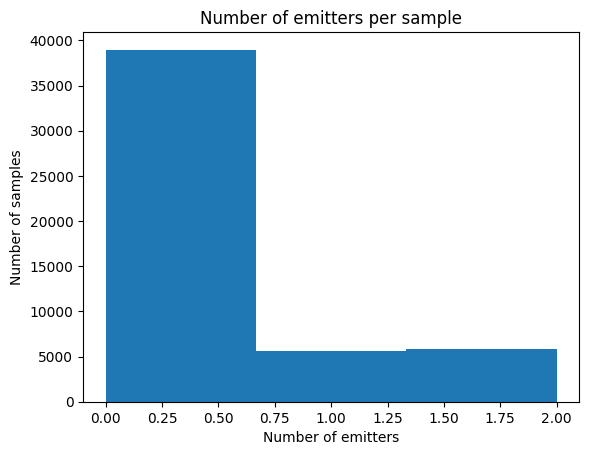

In [3]:
#plot amount of labels for each class
plt.hist(labels, bins=3)
plt.xlabel('Number of emitters')
plt.ylabel('Number of samples')
plt.title('Number of emitters per sample')
plt.show()

In [4]:
#remove specs and labels with label 2
specs = [spec for spec, label in zip(spec, labels) if label != 2]
labels = [label for label in labels if label != 2]
print(len(specs), len(labels))
print(f'Removed {original_length - len(specs)} female USVs')


44584 44584
Removed 5889 female USVs


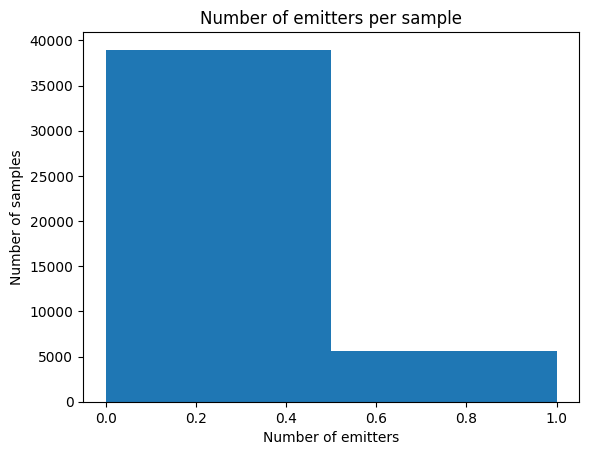

In [5]:
plt.hist(labels, bins=2)
plt.xlabel('Number of emitters')
plt.ylabel('Number of samples')
plt.title('Number of emitters per sample')
plt.show()


C:\Users\ruben\AppData\Local\Temp\ipykernel_23476\1407739844.py:2: DeprecationWarning: This function is deprecated. Please call randint(1, 44584 + 1) instead
  random_index = np.random.random_integers(len(specs))


15334
(15, 1)
[0.01864179] [1.91662969]


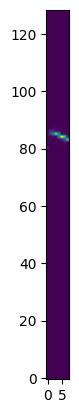

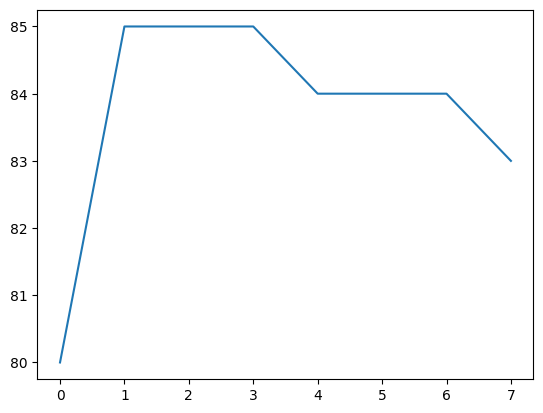

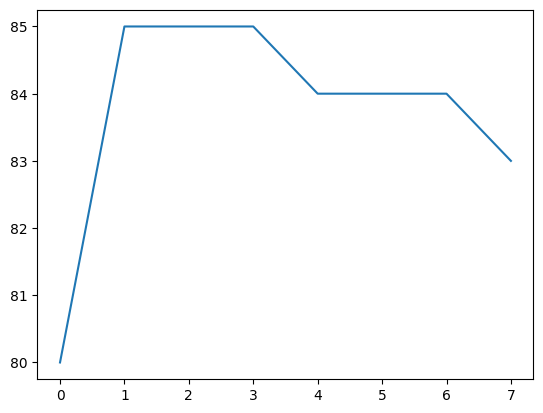

In [6]:
#get usv feature array for all specs
random_index = np.random.random_integers(len(specs))
print(random_index)
usv_feature = features_single.get_usv_features(specs[random_index])
print(usv_feature.shape)
print(usv_feature[8],usv_feature[9])
spectrogram = specs[random_index]
plt.figure()
plt.imshow(spectrogram, origin='lower')
plt.show()
spectral_line_index = features_single.get_spectral_line_index(spectrogram)
spectral_line_index = spectral_line_index.get()
plt.figure()
plt.plot(spectral_line_index)
plt.show()
spectral_line_index, spectral_line_values = features_single.get_spectral_line_values(spectrogram)
spectral_line_index = spectral_line_index.get()
plt.figure()
plt.plot(spectral_line_index)
plt.show()

In [7]:
usv_features = cp.zeros((len(specs), usv_feature.shape[0], usv_feature.shape[1]), dtype=cp.float32)
for spec in range(len(specs)):
    if spec % 100 == 0:
        print(spec)
    usv_feature = features_single.get_usv_features(specs[spec])
    usv_features[spec] = usv_feature
print(usv_features.shape)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [8]:
#save usv features to a file
joblib.dump(usv_features, 'shank3USVs_hardcoded_features_no_female')

['shank3USVs_hardcoded_features_no_female']

In [9]:
#load usv features from a file
usv_features = joblib.load('shank3USVs_hardcoded_features_no_female')

In [10]:
#split the usv_features into its own components
durations = usv_features[:, 0, :]
mean_freqs = usv_features[:, 1, :]
min_freqs = usv_features[:, 2, :]
max_freqs = usv_features[:, 3, :]
bandwidths = usv_features[:, 4, :]
starting_freqs = usv_features[:, 5, :]
stopping_freqs = usv_features[:, 6, :]
directionalities = usv_features[:, 7, :]
coefficient_of_variation = usv_features[:, 8, :]
normalized_irregularity = usv_features[:, 9, :]
local_variability = usv_features[:, 10, :]
nr_of_steps_up = usv_features[:, 11, :]
nr_of_steps_down = usv_features[:, 12, :]
nr_of_peaks = usv_features[:, 13, :]
nr_of_valleys = usv_features[:, 14, :]

In [11]:
print(np.unique(nr_of_peaks, return_counts=True))

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.], dtype=float32), array([28018, 14761,  1383,   317,    74,    22,     7,     1,     1],
      dtype=int64))


In [12]:
durations = cp.asnumpy(durations).squeeze()
durations_df = pd.DataFrame(({'duration': durations, 'emitter_type': labels}))
mean_freqs = cp.asnumpy(mean_freqs).squeeze()
mean_freqs_df = pd.DataFrame(({'mean_freq': mean_freqs, 'emitter_type': labels}))
min_freqs = cp.asnumpy(min_freqs).squeeze()
min_freqs_df = pd.DataFrame(({'min_freq': min_freqs, 'emitter_type': labels}))
max_freqs = cp.asnumpy(max_freqs).squeeze()
max_freqs_df = pd.DataFrame(({'max_freq': max_freqs, 'emitter_type': labels}))
bandwidths = cp.asnumpy(bandwidths).squeeze()
bandwidths_df = pd.DataFrame(({'bandwidth': bandwidths, 'emitter_type': labels}))
starting_freqs = cp.asnumpy(starting_freqs).squeeze()
starting_freqs_df = pd.DataFrame(({'starting_freq': starting_freqs, 'emitter_type': labels}))
stopping_freqs = cp.asnumpy(stopping_freqs).squeeze()
stopping_freqs_df = pd.DataFrame(({'stopping_freq': stopping_freqs, 'emitter_type': labels}))
directionalities = cp.asnumpy(directionalities).squeeze()
directionalities_df = pd.DataFrame(({'directionality': directionalities, 'emitter_type': labels}))
coefficient_of_variation = cp.asnumpy(coefficient_of_variation).squeeze()
coefficient_of_variation_df = pd.DataFrame(({'coefficient_of_variation': coefficient_of_variation, 'emitter_type': labels}))
normalized_irregularity = cp.asnumpy(normalized_irregularity).squeeze()
normalized_irregularity_df = pd.DataFrame(({'normalized_irregularity': normalized_irregularity, 'emitter_type': labels}))
local_variability = cp.asnumpy(local_variability).squeeze()
local_variability_df = pd.DataFrame(({'local_variability': local_variability, 'emitter_type': labels}))
nr_of_steps_up = cp.asnumpy(nr_of_steps_up).squeeze()
nr_of_steps_up_df = pd.DataFrame(({'nr_of_steps_up': nr_of_steps_up, 'emitter_type': labels}))
nr_of_steps_down = cp.asnumpy(nr_of_steps_down).squeeze()
nr_of_steps_down_df = pd.DataFrame(({'nr_of_steps_down': nr_of_steps_down, 'emitter_type': labels}))
nr_of_peaks = cp.asnumpy(nr_of_peaks).squeeze()
nr_of_peaks_df = pd.DataFrame(({'nr_of_peaks': nr_of_peaks, 'emitter_type': labels}))
nr_of_valleys = cp.asnumpy(nr_of_valleys).squeeze()
nr_of_valleys_df = pd.DataFrame(({'nr_of_valleys': nr_of_valleys, 'emitter_type': labels}))


Running Mann-Whitney U tests for Continuous Features...
- Bandwidth: P (MWU) = 4.9634e-05
- Coefficient Of Variation: P (MWU) = 2.8275e-01
- Directionality: P (MWU) = 3.0478e-01
- Duration: P (MWU) = 5.8317e-05
- Local Variability: P (MWU) = 5.9402e-06
- Max Freq: P (MWU) = 8.8062e-47
- Mean Freq: P (MWU) = 8.0667e-63
- Min Freq: P (MWU) = 2.4216e-39
- Normalized Irregularity: P (MWU) = 7.0443e-04
- Starting Freq: P (MWU) = 1.0250e-38
- Stopping Freq: P (MWU) = 1.2540e-37

Running Mann-Whitney U tests for Count Features (Significance appended to Bar Plot Titles)...
- Number of steps up: P (MWU) = 2.2397e-09
- Number of steps down: P (MWU) = 2.0982e-08
- Number of peaks: P (MWU) = 2.7285e-04
- Number of valleys: P (MWU) = 1.0689e-02


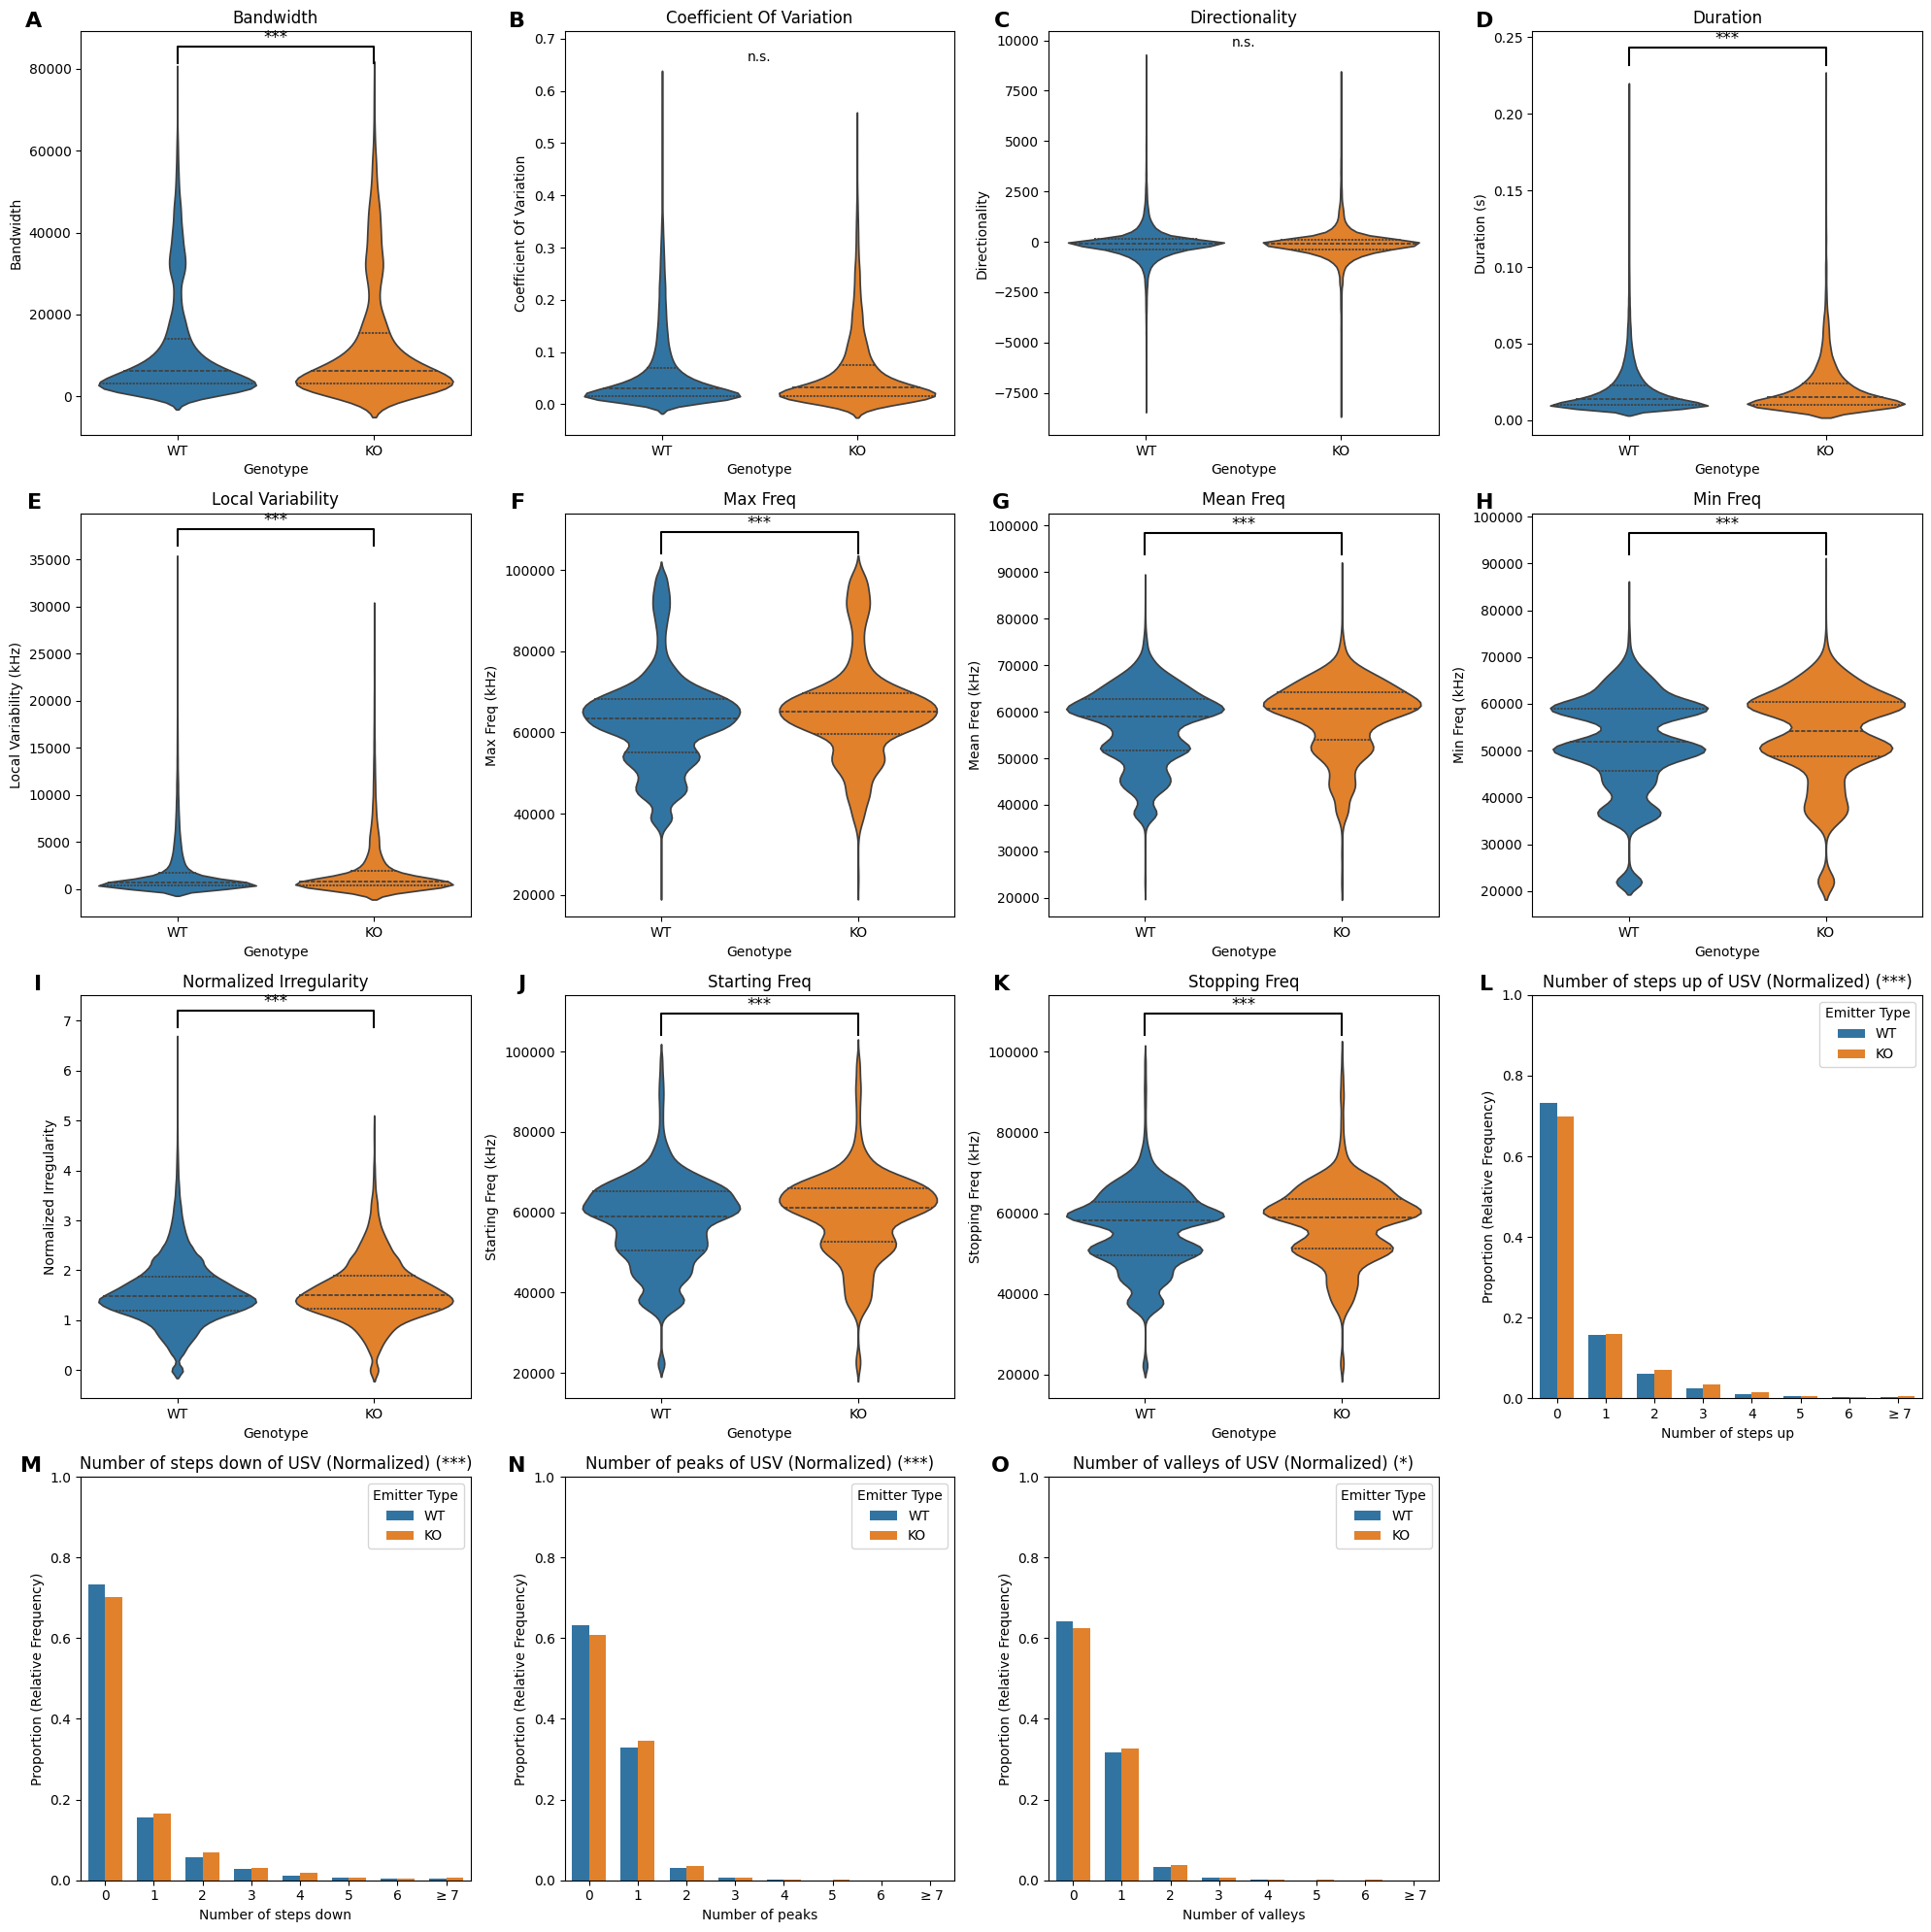

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu, chi2_contingency
import numpy as np 
import warnings

# Suppress UserWarning for tight_layout
warnings.filterwarnings("ignore", category=UserWarning)

# NOTE: This code assumes the following dataframes are already defined 
# in the Jupyter Notebook environment:
# - DataFrames for continuous features (e.g., mean_freq_df, max_freq_df, duration_df)
# - DataFrames for count features (nr_of_steps_up_df, nr_of_steps_down_df, 
#   nr_of_peaks_df, nr_of_valleys_df)
# Each of these must contain an 'emitter_type' column (0 or 1) and the feature column.

# --- STATISTICAL ANALYSIS FUNCTIONS ---

def chi_squared_test(df, column_name, max_count):
    """
    Performs the Chi-Squared Test of Independence on the aggregated count data.
    (Retained but NOT used for the final 4 plots in this revised code.)
    """
    # Clip and aggregate the count column (same logic as used for plotting)
    df_clipped = df.copy()
    df_clipped[column_name] = pd.to_numeric(df_clipped[column_name], errors='coerce').fillna(0).astype(int)
    df_clipped[column_name] = df_clipped[column_name].apply(
        lambda x: x if x <= max_count else max_count + 1
    )
    
    # Create the contingency table
    contingency_table = pd.crosstab(df_clipped['emitter_type'], df_clipped[column_name])

    # Perform the Chi-Squared test
    if contingency_table.shape[0] < 2 or contingency_table.shape[1] < 2:
        return 1.0
        
    _, p_value, _, _ = chi2_contingency(contingency_table)
    
    return p_value

def mann_whitney_u_test(df, column_name):
    """Performs Mann-Whitney U test and returns the P-value."""
    # Ensure column is numeric before splitting
    df_numeric = df.copy()
    df_numeric[column_name] = pd.to_numeric(df_numeric[column_name], errors='coerce')
    
    group0 = df_numeric[df_numeric['emitter_type'] == 0][column_name].dropna().values
    group1 = df_numeric[df_numeric['emitter_type'] == 1][column_name].dropna().values
    
    if len(group0) < 2 or len(group1) < 2:
        return 1.0 
    
    try:
        # Use method='auto' for robustness
        _, p_value = mannwhitneyu(group0, group1, alternative='two-sided', method='auto')
    except ValueError:
        p_value = 1.0 

    return p_value

# --- PLOTTING UTILITY FUNCTIONS ---

def add_significance_annotation(ax, p_value, y_max, annotation_type='comparison', x_center=0.5):
    """Adds significance bar/asterisks to a plot or title."""
    
    if p_value < 0.001:
        stars = '***'
    elif p_value < 0.01:
        stars = '**'
    elif p_value < 0.05:
        stars = '*'
    else:
        stars = 'n.s.' # not significant

    if annotation_type == 'comparison':
        # Annotation for Violin Plots (WT vs KO comparison on a single column)
        y_lim = ax.get_ylim()
        new_y_max = y_max * 1.15
        ax.set_ylim(y_lim[0], new_y_max)
        
        x1, x2 = 0, 1
        y = y_max * 1.05
        
        if p_value < 0.05:
            ax.plot([x1, x1, x2, x2], [y, y * 1.05, y * 1.05, y], lw=1.5, c='k')
            ax.text((x1 + x2) * 0.5, y * 1.05, stars, ha='center', va='bottom', color='k', fontsize=12)
        else:
            ax.text(0.5, y, stars, ha='center', va='bottom', color='k', fontsize=10)

    elif annotation_type == 'title':
        # Annotation for Bar Plots 
        title = ax.get_title()
        ax.set_title(f"{title} ({stars})")
        
    return stars

def add_subplot_label(ax, index, n_cols, x_offset=-0.1, y_offset=1.05, fontsize=16, weight='bold'):
    """Adds a subplot label (A, B, C, ...) to the top-left corner of the axis."""
    label = chr(ord('A') + index)
    ax.text(x_offset, y_offset, label, transform=ax.transAxes, 
             fontsize=fontsize, fontweight=weight, va='top', ha='right')
    
# --- DATA GATHERING AND MAPPING (Accessing existing variables) ---

continuous_dfs_filtered = {}

# Use globals() to find DataFrames defined in the notebook session
for name, value in globals().items():
    if name.endswith('_df') and isinstance(value, pd.DataFrame):
        feature_cols = [col for col in value.columns if col != 'emitter_type']
        
        if len(feature_cols) == 1:
            feature_name = feature_cols[0]
            
            # Exclude count features for the violin plot section
            if not feature_name.startswith('nr_of_'):
                continuous_dfs_filtered[feature_name] = value

sorted_features = sorted(continuous_dfs_filtered.keys())

def get_plot_labels(feature_name):
    title = feature_name.replace('_', ' ').title()
    y_label = title 
    if 'freq' in feature_name.lower() or 'variability' in feature_name.lower():
        y_label += ' (kHz)'
    elif 'duration' in feature_name.lower():
        y_label += ' (s)'
    
    return title, y_label

# --- PLOTTING EXECUTION ---

num_plots = len(continuous_dfs_filtered) + 4
n_rows = 4
n_cols = 4 

plt.figure(figsize=(20, 20))

# 1. Plot Continuous Features (Violin Plots - Mann-Whitney U Test)
print("Running Mann-Whitney U tests for Continuous Features...")

for i, feature_name in enumerate(sorted_features):
    df = continuous_dfs_filtered[feature_name]
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    add_subplot_label(ax, i, n_cols) 

    title, y_label = get_plot_labels(feature_name)

    sns.violinplot(y=feature_name, x='emitter_type', data=df, inner='quartile', hue='emitter_type', ax=ax)
    
    ax.get_legend().remove()
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['WT', 'KO'])
    ax.set_ylabel(y_label)
    ax.set_xlabel('Genotype')
    ax.set_title(title)
    
    # Perform the Mann-Whitney U test and annotate
    p_value = mann_whitney_u_test(df, feature_name)
    y_data = df[feature_name].dropna().values
    y_max = np.nanmax(y_data) if y_data.size > 0 else 0
    
    add_significance_annotation(ax, p_value, y_max, annotation_type='comparison') 
    print(f"- {title}: P (MWU) = {p_value:.4e}")

# 2. Plot Count Features (Bar Plots - Mann-Whitney U Test for significance)
MAX_COUNT = 6
AGGREGATE_VALUE = MAX_COUNT + 1
new_xlabels = [str(i) for i in range(AGGREGATE_VALUE)] + [r'$\geq 7$'] 

def calculate_proportions_aggregated(df, column_name, max_count=MAX_COUNT):
    # This logic preserves the original bar plot distributions
    df_clipped = df.copy()
    df_clipped[column_name] = pd.to_numeric(df_clipped[column_name], errors='coerce').fillna(0).astype(int)
    df_clipped[column_name] = df_clipped[column_name].apply(
        lambda x: x if x <= max_count else max_count + 1
    )
    proportions_df = df_clipped.groupby('emitter_type')[column_name].value_counts(
        normalize=True
    ).rename('proportion').reset_index()
    proportions_df.rename(columns={column_name: 'count_value'}, inplace=True)
    
    all_counts = range(AGGREGATE_VALUE + 1)
    index_names = ['emitter_type', 'count_value']
    proportions_df_unique_types = proportions_df['emitter_type'].unique()
    if len(proportions_df_unique_types) > 0:
        full_index = pd.MultiIndex.from_product([proportions_df_unique_types, all_counts], names=index_names)
        proportions_df = proportions_df.set_index(index_names).reindex(full_index, fill_value=0.0).reset_index()
    
    return proportions_df

# Manually define the list of count features and their associated dataframes
# This relies on the specific variable names being defined in the notebook
count_plot_data = []
try:
    count_plot_data = [
        (nr_of_steps_up_df, 'nr_of_steps_up', 'Number of steps up'),
        (nr_of_steps_down_df, 'nr_of_steps_down', 'Number of steps down'),
        (nr_of_peaks_df, 'nr_of_peaks', 'Number of peaks'),
        (nr_of_valleys_df, 'nr_of_valleys', 'Number of valleys'),
    ]
except NameError as e:
    print(f"Error: One of the count dataframes is not defined: {e}")


start_index = len(continuous_dfs_filtered)
if count_plot_data:
    print("\nRunning Mann-Whitney U tests for Count Features (Significance appended to Bar Plot Titles)...")

    for i, (df, col_name, x_label) in enumerate(count_plot_data):
        absolute_index = start_index + i
        subplot_num = absolute_index + 1
        
        props = calculate_proportions_aggregated(df, col_name, max_count=MAX_COUNT)
        ax = plt.subplot(n_rows, n_cols, subplot_num)
        
        add_subplot_label(ax, absolute_index, n_cols)
        
        # BAR PLOT VISUALIZATION (STRICTLY PRESERVED)
        sns.barplot(x='count_value', y='proportion', hue='emitter_type', data=props, ax=ax, width=0.7) 
        
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        ax.legend(handles=legend_handles, labels=['WT', 'KO'], title='Emitter Type', loc='upper right')
        
        ax.set_xlabel(x_label)
        ax.set_ylabel('Proportion (Relative Frequency)')
        ax.set_title(f'{x_label} of USV (Normalized)')
        ax.set_ylim(0,1)

        ax.set_xticks(range(AGGREGATE_VALUE + 1)) 
        ax.set_xticklabels(new_xlabels)
        ax.set_xlim(-0.5, AGGREGATE_VALUE + 0.5)

        # *** MODIFICATION: Run Mann-Whitney U test (MWU) for significance ***
        p_value = mann_whitney_u_test(df, col_name) 
        
        # Append MWU result to the title
        add_significance_annotation(ax, p_value, 0, annotation_type='title') 
        print(f"- {x_label}: P (MWU) = {p_value:.4e}")

plt.tight_layout()
plt.show()